<a href="https://colab.research.google.com/github/deekshantsaxena/IIT-B/blob/main/equation_solution_with_bayes_neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import torch
import pandas as pd
import torch.optim as optim
!pip install torchbnn
import torchbnn as bnn




In [11]:
# def pseudo_uniform_good(mult=16807,
#                         mod=(2**31)-1,
#                         seed=123456789,
#                         low=0,
#                         high=1,
#                         size=1):

def program (RDS202210043_LRL_number_of_cascaded_LRL,y_x_relationship='sqrt' or 'log'):
  mult=16807
  mod=(2**31)-1
  seed=123456789
  low=0 # lower bound
  high=1 # upper bound
  size=1000

  U = np.zeros(size)
  x = (seed*mult+1)%mod
  U[0] = x/mod
  for i in range(0,size):
      x = (x*mult+1)%mod
      U[i] = x/mod
  l= U* (high-low) +low
  # def pseudo_uniform(low=0,
  #                    high=1.1,
  #                   seed=123456789,
  #                   size=1):


  # return low+(high-low)*pseudo_uniform_good(seed=seed,size=size)
  # l=pseudo_uniform_good(low=0,high=1,size=1000)
  # plt.hist(l,bins=20,edgecolor='k')
  # plt.xticks(fontsize=15)
  # plt.yticks(fontsize=15)
  # plt.xlim(-2,2)
  # plt.show()
  y=np.zeros(1000)
  if (y_x_relationship == 'sqrt'):
    for i in range (1000):
      # y[i] = (math.log (l[i]+0.01))
      y[i] = (math.sqrt (l[i]))
      
      # print (y[i],l[i])
  if (y_x_relationship == 'log'):
    for i in range (1000):
      y[i] = (math.log (l[i]+0.01))
      # y[i] = (math.sqrt (l[i]))
      
      # print (y[i],l[i])
  t_y = torch.from_numpy(y)
  print (type(t_y))

  re_y=torch.reshape(t_y, (1,1000))

  re_y.shape

  t_l = torch.from_numpy(l)
  print (type(t_l))

  re_l=torch.reshape(t_l, (1,1000))

  re_l.shape

  N, D_in, H, D_out = 1, 1000, 1, 1000
  device = torch.device('cpu')
  model = torch.nn.Sequential(
          bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=D_in, out_features=H),
          # torch.nn.bayesLinear(D_in, H),
          # torch.nn.ReLU(),
          torch.nn.ReLU(),
          bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=H, out_features=D_out)
          # torch.nn.Linear(H, D_out),
        ).to(device)
  a=[]

  loss_fn = torch.nn.MSELoss(reduction='sum')

  learning_rate = 1e-4
  for t in range(RDS202210043_LRL_number_of_cascaded_LRL):

    y_pred = model(re_l.float())
    # print (y_pred)

    cross_entropy_loss = torch.nn.CrossEntropyLoss()
    klloss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
    klweight = 0.01
    # optimizer = optim.Adam(model.parameters(), lr=1e-4)



    models = model(re_l.float())
    cross_entropy = cross_entropy_loss(models, re_y.float())
    kl = klloss(model)
    total_cost = cross_entropy + klweight*kl


    loss = loss_fn(y_pred.float(), re_y.float())
    loss = total_cost
    a.append(loss)
    # print (t,loss)
    # print(t, loss.item())
    

    model.zero_grad()


    loss.backward()

    with torch.no_grad():
      for param in model.parameters():
        param.data -= learning_rate * param.grad
  # print (y_pred[0,900], re_y[0,900])

  b=[]
  for kk in range (RDS202210043_LRL_number_of_cascaded_LRL):
    b.append (a[kk].item())

  x_plot=[]
  for j in range (RDS202210043_LRL_number_of_cascaded_LRL):
    x_plot.append(j)



  
  # x axis values

  # corresponding y axis values


  # plotting the points
  plt.plot(x_plot[0:RDS202210043_LRL_number_of_cascaded_LRL],b[0:RDS202210043_LRL_number_of_cascaded_LRL])

  # naming the x axis
  plt.xlabel('iterations')
  # naming the y axis
  plt.ylabel('loss')

  # giving a title to my graph
  plt.title('My first graph!')

  # function to show the plot
  plt.show()
  p1=y_pred.detach().numpy()
  p1.shape


  p=re_y.numpy()
  res=p.reshape(1000,1)
  res.shape

  # p1=y_pred.numpy()
  res1=p1.reshape(1000,1)
  res1.shape

  df1 = pd.DataFrame (res, columns = ['res'] )
  # print (df1)
  df2 = pd.DataFrame (l, columns = ['l'] )
  df3 = pd.DataFrame (res1, columns = ['res'] )

  tt=0
  tt1=0
  model = []
  for tt in range (1000):

      model.append(tt)
      model[tt]='x and y'

  model1 = []
  for tt1 in range (1000):

      model1.append(tt1)
      model1[tt1]='x and y hat'

  df4 = pd.DataFrame (model, columns = ['model'] )
  df5 = pd.DataFrame (model1, columns = ['model'] )
  df5[0:5]
  df6= pd.concat([df4[0:1000],df2, df1], axis=1)
  df7= pd.concat([df5[0:1000],df2, df3], axis=1)
  df8= pd.concat([df6, df7], axis=0)
  df9=df8.sort_values("l")
  df9

  fig, ax = plt.subplots(figsize=(10, 5))
  sns.scatterplot(data=df9, x='l', y='res',hue ='model', ax=ax)

<class 'torch.Tensor'>
<class 'torch.Tensor'>


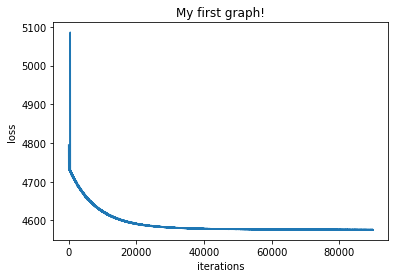

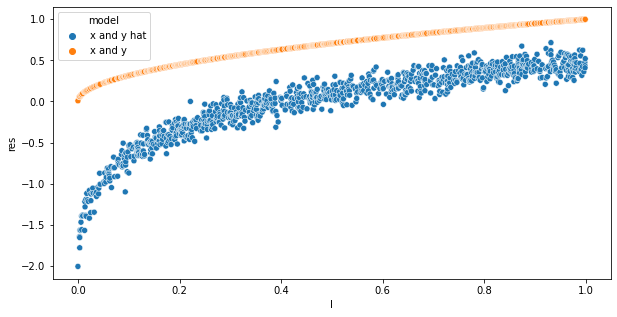

In [24]:
program (RDS202210043_LRL_number_of_cascaded_LRL= 90000,y_x_relationship='sqrt')

